In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


In [2]:
# Diretório base: a pasta onde está o notebook
BASE_DIR = Path().resolve()

# Subpastas organizadas
RAW = BASE_DIR / "data" / "raw"     # onde ficam os arquivos originais
OUT = BASE_DIR / "data" / "output"  # onde vão os resultados

print("Base dir :", BASE_DIR)
print("RAW dir  :", RAW)
print("OUT dir  :", OUT)


df = pd.read_csv(RAW/'heart_disease_dataset.csv', encoding='utf-8', sep=',')
print("Dimensões (linhas, colunas):", df.shape)

display(df.head(10))

Base dir : C:\Users\Joao\Documents\projetos_python\Heart_Dis
RAW dir  : C:\Users\Joao\Documents\projetos_python\Heart_Dis\data\raw
OUT dir  : C:\Users\Joao\Documents\projetos_python\Heart_Dis\data\output
Dimensões (linhas, colunas): (3069, 17)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
0,67,1,2,111,536,0,2,88,0,1.3,3,2,3,1,0,23.4,1
1,57,1,3,109,107,0,2,119,0,5.4,2,0,3,0,1,35.4,0
2,43,1,4,171,508,0,1,113,0,3.7,3,0,7,1,1,29.9,0
3,71,0,4,90,523,0,2,152,0,4.7,2,1,3,1,0,15.2,1
4,36,1,2,119,131,0,2,128,0,5.9,3,1,3,1,0,16.7,1
5,49,1,1,186,571,0,0,176,0,4.0,3,0,3,1,0,33.8,0
6,67,1,1,113,127,1,0,68,0,6.1,2,3,3,1,0,26.2,0
7,47,1,2,103,305,0,0,185,0,1.9,2,0,3,1,0,25.1,0
8,51,0,4,125,592,1,0,136,0,1.2,3,0,6,0,0,18.6,0
9,39,0,2,158,486,0,0,69,0,2.5,1,0,3,0,0,18.9,0


In [3]:
print("\nColunas:", list(df.columns))
print("\nTipos:")
print(df.dtypes)


Colunas: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'smoking', 'diabetes', 'bmi', 'heart_disease']

Tipos:
age                int64
sex                int64
cp                 int64
trestbps           int64
chol               int64
fbs                int64
restecg            int64
thalach            int64
exang              int64
oldpeak          float64
slope              int64
ca                 int64
thal               int64
smoking            int64
diabetes           int64
bmi              float64
heart_disease      int64
dtype: object


In [4]:
print("\n'describe das colunas':")
display(df.describe())


'describe das colunas':


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,smoking,diabetes,bmi,heart_disease
count,3069.00000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000,3069.000000
mean,52.50114,0.555556,2.489736,145.306289,347.219941,0.145650,1.004236,135.157380,0.176279,3.189052,2.023786,0.626588,4.544477,0.348974,0.193874,27.496839,0.388074
std,13.70752,0.496985,1.110417,31.602321,146.853319,0.352813,0.812016,43.353197,0.381119,1.802815,0.817679,0.891447,1.751064,0.476723,0.395396,7.281731,0.487391
min,29.00000,0.000000,1.000000,90.000000,100.000000,0.000000,0.000000,60.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,15.000000,0.000000
25%,41.00000,0.000000,2.000000,118.000000,215.000000,0.000000,0.000000,98.000000,0.000000,1.600000,1.000000,0.000000,3.000000,0.000000,0.000000,21.300000,0.000000
50%,53.00000,1.000000,2.000000,146.000000,350.000000,0.000000,1.000000,135.000000,0.000000,3.200000,2.000000,0.000000,3.000000,0.000000,0.000000,27.400000,0.000000
75%,64.00000,1.000000,3.000000,172.000000,475.000000,0.000000,2.000000,172.000000,0.000000,4.700000,3.000000,1.000000,6.000000,1.000000,0.000000,33.900000,1.000000
max,76.00000,1.000000,4.000000,200.000000,600.000000,1.000000,2.000000,210.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000,1.000000,40.000000,1.000000


In [5]:
print('Valores nulos por coluna:')
df.isnull().sum()

Valores nulos por coluna:


age              0
sex              0
cp               0
trestbps         0
chol             0
fbs              0
restecg          0
thalach          0
exang            0
oldpeak          0
slope            0
ca               0
thal             0
smoking          0
diabetes         0
bmi              0
heart_disease    0
dtype: int64

Não há valores nulos no dataset

In [6]:
# Balanceamento da variável alvo

target = "heart_disease"

counts = df[target].value_counts().sort_index()
print("Contagem por classe (0 = não tem doença, 1 = tem doença):")
print(counts)

print("\nProporções (%):")
print((counts / counts.sum() * 100).round(2))

Contagem por classe (0 = não tem doença, 1 = tem doença):
heart_disease
0    1878
1    1191
Name: count, dtype: int64

Proporções (%):
heart_disease
0    61.19
1    38.81
Name: count, dtype: float64


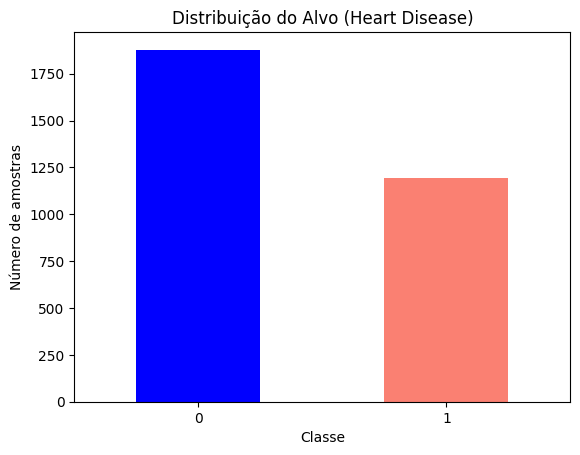

In [7]:
# Histograma simples
counts.plot(kind="bar", color=["blue", "salmon"])
plt.title("Distribuição do Alvo (Heart Disease)")
plt.xlabel("Classe")
plt.ylabel("Número de amostras")
plt.xticks(rotation=0)
plt.show()

In [8]:
# Bloco 3 — Estatísticas descritivas por classe do alvo

target = "heart_disease"

# Selecionar apenas colunas numéricas (excluindo a própria 'heart_disease')
num_cols = df.select_dtypes(include=[np.number]).columns.drop(target)

# Agrupar pelo alvo e calcular estatísticas básicas
stats = df.groupby(target)[num_cols].agg(['mean', 'median', 'std'])

display(stats)

age                         sex                   \
                    mean median        std      mean median       std   
heart_disease                                                           
0              49.371672   49.0  13.429676  0.555911    1.0  0.496997   
1              57.435768   60.0  12.653854  0.554996    1.0  0.497175   

                     cp                     trestbps  ...      thal   smoking  \
                   mean median       std        mean  ...       std      mean   
heart_disease                                         ...                       
0              2.489883    2.5  1.107755  145.363152  ...  1.749773  0.354633   
1              2.489505    2.0  1.115068  145.216625  ...  1.753567  0.340050   

                                diabetes                         bmi         \
              median       std      mean median       std       mean median   
heart_disease                                                                 
0                0.0  0.478529  0.195953    0.0  0.397038  27.528594   27.4   
1                0.0  0.473925  0.190596    0.0  0.392936  27.446767   27.4   

                         
                    std  
heart_disease            
0              7.246019  
1              7.340464  

[2 rows x 48 columns]

## ✅ esse resultado já mostra dados interessantes:

1. Quem tem doença (1) tem idade média bem maior (~57 anos) do que quem não tem (0) (~49 anos).

2. outras variáveis (como bmi, pressão, colesterol) podem estar próximas, mas o padrão de idade chama a atenção.

# 4 — Boxplots por classe para algumas variáveis numéricas

<Figure size 500x400 with 0 Axes>

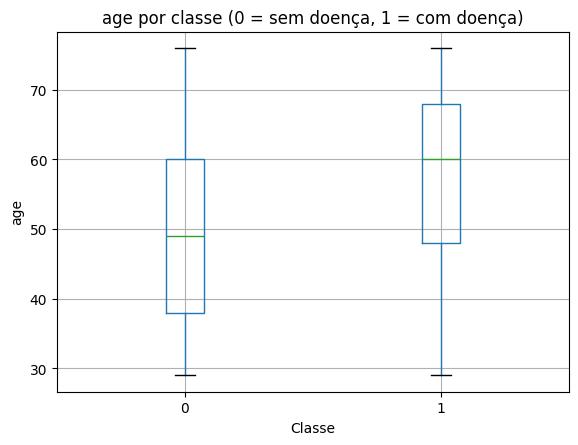

<Figure size 500x400 with 0 Axes>

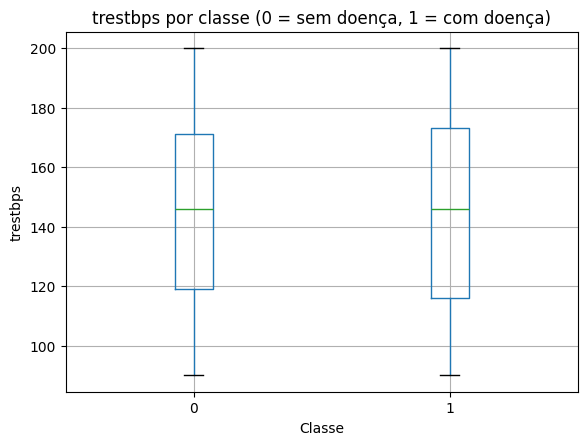

<Figure size 500x400 with 0 Axes>

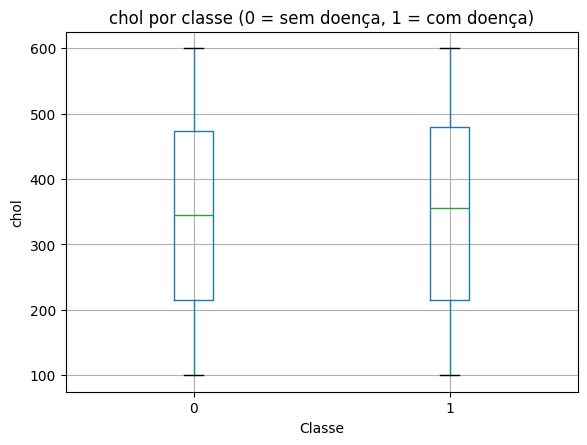

<Figure size 500x400 with 0 Axes>

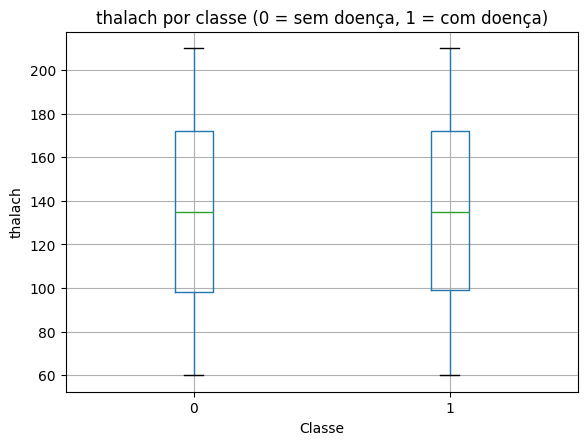

<Figure size 500x400 with 0 Axes>

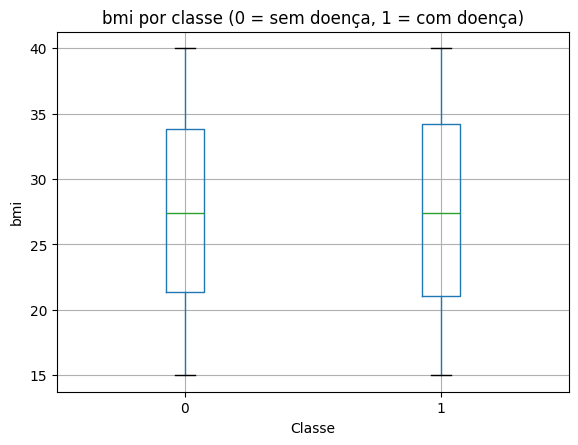

In [9]:
num_cols = df.select_dtypes(include=[np.number]).columns.drop("heart_disease")

# escolher algumas variáveis relevantes para exemplo
sample_cols = ["age", "trestbps", "chol", "thalach", "bmi"]

for col in sample_cols:
    plt.figure(figsize=(5, 4))
    df.boxplot(column=col, by="heart_disease")
    plt.title(f"{col} por classe (0 = sem doença, 1 = com doença)")
    plt.suptitle("")  # remove título duplicado
    plt.xlabel("Classe")
    plt.ylabel(col)
    plt.show()

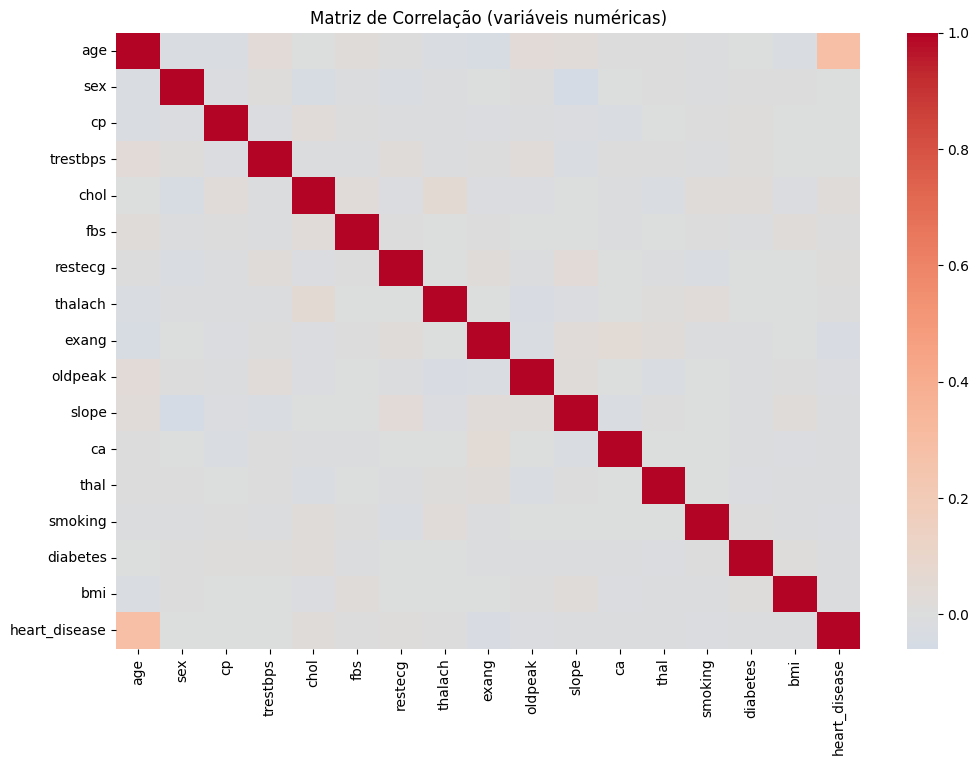


Correlação com a variável alvo (heart_disease):
heart_disease    1.000000
age              0.286731
chol             0.015789
restecg          0.012317
thalach          0.007567
fbs              0.006693
cp              -0.000166
sex             -0.000897
trestbps        -0.002260
bmi             -0.005477
diabetes        -0.006603
slope           -0.009266
thal            -0.010874
ca              -0.012953
oldpeak         -0.014341
smoking         -0.014909
exang           -0.033249
Name: heart_disease, dtype: float64


In [10]:
# Selecionar apenas colunas numéricas (incluindo o alvo)
num_cols = df.select_dtypes(include=[np.number]).columns

corr = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Matriz de Correlação (variáveis numéricas)")
plt.show()

# Correlação da variável alvo com os demais atributos
print("\nCorrelação com a variável alvo (heart_disease):")
print(corr["heart_disease"].sort_values(ascending=False))

In [11]:
# Correlação do alvo com os outros atributos numéricos
corr_target = df.corr(numeric_only=True)["heart_disease"].sort_values(ascending=False)
print(corr_target)

heart_disease    1.000000
age              0.286731
chol             0.015789
restecg          0.012317
thalach          0.007567
fbs              0.006693
cp              -0.000166
sex             -0.000897
trestbps        -0.002260
bmi             -0.005477
diabetes        -0.006603
slope           -0.009266
thal            -0.010874
ca              -0.012953
oldpeak         -0.014341
smoking         -0.014909
exang           -0.033249
Name: heart_disease, dtype: float64


### Interpretação do heatmap
As variáveis numéricas não apresentam correlações lineares fortes entre si nem com a variável alvo.
Isso sugere que técnicas lineares simples (como correlação de Pearson) não capturam bem a relação com `heart_disease`.
Modelos não lineares (árvores, ensembles) provavelmente terão melhor desempenho.

In [12]:
# Definir alvo e features
target = "heart_disease"
X = df.drop(columns=[target])
y = df[target]

# Separar colunas numéricas e categóricas
num_cols = X.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()

print('Colunas: \n')
print("Numéricas:", num_cols)
print("Categóricas:", cat_cols)

Colunas: 

Numéricas: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'smoking', 'diabetes', 'bmi']
Categóricas: []


In [13]:
# Split treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

# Pré-processamento: padronizar numéricas, one-hot nas categóricas
preprocess = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols),
    ]
)

# Pipeline com regressão logística
logreg = Pipeline(
    steps=[("preprocess", preprocess),
           ("model", LogisticRegression(max_iter=1000, random_state=42))]
)

# Treinar
logreg.fit(X_train, y_train)

# Prever
y_pred = logreg.predict(X_test)
y_proba = logreg.predict_proba(X_test)[:, 1]

# Avaliar
metrics = {
    "accuracy": accuracy_score(y_test, y_pred),
    "precision": precision_score(y_test, y_pred),
    "recall": recall_score(y_test, y_pred),
    "f1": f1_score(y_test, y_pred),
    "roc_auc": roc_auc_score(y_test, y_proba)
}

In [14]:
print("\nMétricas — Regressão Logística (baseline):")
for k, v in metrics.items():
    print(f"{k:10}: {v:.3f}")

# Matriz de confusão
cm = confusion_matrix(y_test, y_pred)
print("\nMatriz de Confusão:")
print(cm)


Métricas — Regressão Logística (baseline):
accuracy  : 0.635
precision : 0.544
recall    : 0.372
f1        : 0.442
roc_auc   : 0.652

Matriz de Confusão:
[[377  93]
 [187 111]]
